In [120]:
import pandas as pd
from IPython.display import display

def load_data(speeches_path: str, sentiment_path: str):
    """
    Load speeches and sentiment wordlist datasets.

    Parameters:
    speeches_path (str): Path to the speeches CSV file.
    sentiment_path (str): Path to the sentiment-labelled wordlist Excel file.

    Returns:
    tuple: A tuple containing two pandas DataFrames (speeches_df, sentiment_df).
    """
    speeches_df = pd.read_csv(speeches_path)
    sentiment_df = pd.read_excel(sentiment_path)
    
    display(speeches_df.head())
    display(sentiment_df.head())
    
    return speeches_df, sentiment_df

# Paths to your files
speeches_path = r"C:\Users\Srila\OneDrive\Documents\all_speeches.csv"
sentiment_path = r"C:\Users\Srila\OneDrive\Documents\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx"

# Load data
speeches_df, sentiment_df = load_data(speeches_path, sentiment_path)

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0


In [121]:
def explore_data(speeches_df: pd.DataFrame, sentiment_df: pd.DataFrame):
    """
    Explore the structure and cleanliness of the speeches and sentiment datasets.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.
    sentiment_df (DataFrame): Sentiment-labelled wordlist.

    Returns:
    None
    """
    print("\n--- Speeches Dataset ---\n")
    display(speeches_df.info())
    display(speeches_df.describe())
    display(speeches_df.isnull().sum())

    print("\n--- Sentiment Wordlist ---\n")
    display(sentiment_df.info())
    display(sentiment_df.describe())
    display(sentiment_df.isnull().sum())

# Run exploration
explore_data(speeches_df, sentiment_df)


--- Speeches Dataset ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  7721 non-null   object
 1   country    7721 non-null   object
 2   date       7721 non-null   object
 3   title      7721 non-null   object
 4   author     7721 non-null   object
 5   is_gov     7721 non-null   int64 
 6   text       7721 non-null   object
dtypes: int64(1), object(6)
memory usage: 422.4+ KB


None

,is_gov
count,7721.000000
mean,0.347235
std,0.476122
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


reference    0
country      0
date         0
title        0
author       0
is_gov       0
text         0
dtype: int64


--- Sentiment Wordlist ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Word          3880 non-null   object
 1   Negative      3880 non-null   int64 
 2   Positive      3880 non-null   int64 
 3   Uncertainty   3880 non-null   int64 
 4   Litigious     3880 non-null   int64 
 5   Strong        3880 non-null   int64 
 6   Weak          3880 non-null   int64 
 7   Constraining  3880 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 242.6+ KB


None

,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
count,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000
mean,0.606959,0.092268,0.076546,0.233247,0.004897,0.006959,0.047423
std,0.488489,0.289441,0.265905,0.422953,0.069815,0.083139,0.212569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Word            0
Negative        0
Positive        0
Uncertainty     0
Litigious       0
Strong          0
Weak            0
Constraining    0
dtype: int64

In [122]:
def clean_dates(speeches_df: pd.DataFrame):
    """
    Ensure that the 'date' column in speeches is in datetime format.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with datetime parsed.
    """
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    display(speeches_df.head())
    return speeches_df

# Clean date columns
speeches_df = clean_dates(speeches_df)

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [123]:
def display_data_overview(speeches_df, sentiment_df):
    print("=== Speeches DataFrame Head ===")
    print(speeches_df.head())
    print("\n=== Sentiment DataFrame Head ===")
    print(sentiment_df.head())
    print("\n=== Speeches DataFrame Columns ===")
    print(speeches_df.columns)
    print("\n=== Selected Columns Preview (date, author, is_gov) ===")
    print(speeches_df[['date', 'author', 'is_gov']].head())

In [124]:
display_data_overview(speeches_df, sentiment_df)

=== Speeches DataFrame Head ===
      reference    country       date                               title  \
0  r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia 1991-10-03                                       
2  r920314a_BOA  australia 1992-03-14                                       
3  r920529a_BOA  australia 1992-05-29                                       
4  r920817a_BOA  australia 1992-08-17                                       

   author  is_gov                                               text  
0  fraser       0  They would no doubt argue that to have two obj...  
1  fraser       0  Today I wish to talk about real interest rates...  
2  fraser       0  I welcome this opportunity to talk about prosp...  
3  fraser       0  It is a pleasure to have this opportunity to a...  
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...  

=== Sentiment DataFrame Head ===
           Word  Negative  Positive  Uncertai

In [125]:
import pandas as pd
from IPython.display import display

# Load the CSV file (update with your actual file path)
file_path = r"C:\Users\Srila\OneDrive\Documents\boe_sentiment_results.csv"
boe_speeches_df = pd.read_csv(file_path)

# Display first few rows in a nicely formatted table
display(boe_speeches_df.head())

,Reference,Title,Gpt_sentiment
0,r980915a_BOE,Speech,Positive
1,r981021b_BOE,Britain in Europe,Positive
2,r981021a_BOE,Impact of the recent turbulence in internation...,Neutral
3,r981101a_BOE,"Economic policy, with and without forecasts",Neutral
4,r981101b_BOE,Inflation targeting in practice: the UK experi...,Positive


In [126]:
print(boe_speeches_df.columns)  # Lists all available column names

Index(['Reference', 'Title', 'Gpt_sentiment'], dtype='object')


In [127]:
# Count total speeches
total_speeches = len(boe_speeches_df)

# Count total sentiment labels (avoids missing/null values)
total_sentiments = boe_speeches_df["Gpt_sentiment"].count()

# Display results
print(f" Total Speeches: {total_speeches}")
print(f" Total Sentiment Labels Assigned: {total_sentiments}")

 Total Speeches: 1209
 Total Sentiment Labels Assigned: 1209


In [128]:
import matplotlib.pyplot as plt

# Mapping sentiment labels to numeric values
sentiment_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1}
boe_speeches_df["Sentiment_Score"] = boe_speeches_df["Gpt_sentiment"].map(sentiment_mapping)

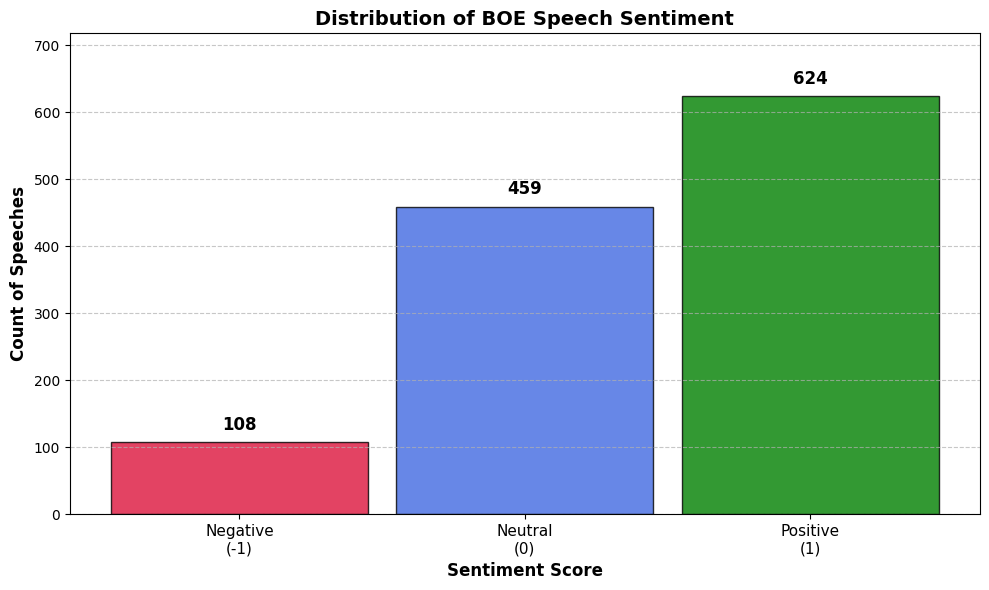

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Use default style for light background
plt.style.use('default')

# Define colors for each sentiment category - darker colors for light background
colors = {1: "green", 0: "royalblue", -1: "crimson"}

# Create histogram with different colors for each sentiment
plt.figure(figsize=(10, 6))
bins = [-1.5, -0.5, 0.5, 1.5]  # Bin edges for Negative, Neutral, Positive
hist, bin_edges = np.histogram(boe_speeches_df["Sentiment_Score"], bins=bins)

# Plot each bar with its corresponding color
for i in range(len(hist)):
    # Create bar
    bar = plt.bar(bin_edges[i] + 0.5, hist[i], width=0.9, 
           color=colors[int(bin_edges[i] + 0.5)], 
           edgecolor="black", alpha=0.8)
    
    # Add count annotation above each bar
    plt.text(bin_edges[i] + 0.5, hist[i] + (max(hist) * 0.02), 
             f"{hist[i]}", 
             ha='center', va='bottom', 
             fontweight='bold', fontsize=12)

# Add labels and title with dark text for light background
plt.xlabel("Sentiment Score", fontsize=12, fontweight='bold')
plt.ylabel("Count of Speeches", fontsize=12, fontweight='bold')
plt.title("Distribution of BOE Speech Sentiment", fontsize=14, fontweight='bold')
plt.xticks([-1, 0, 1], ["Negative\n(-1)", "Neutral\n(0)", "Positive\n(1)"], fontsize=11)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a bit more space at the top for annotations
plt.ylim(0, max(hist) * 1.15)

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

In [130]:
import pandas as pd

# Extract only the numeric part of the reference column
boe_speeches_df["Date"] = boe_speeches_df["Reference"].str.extract(r"(\d{6})")  # Extracts six-digit date (YYMMDD)

# Convert extracted values into proper datetime format
boe_speeches_df["Date"] = pd.to_datetime(boe_speeches_df["Date"], format="%y%m%d")

### Plot sentiments over time

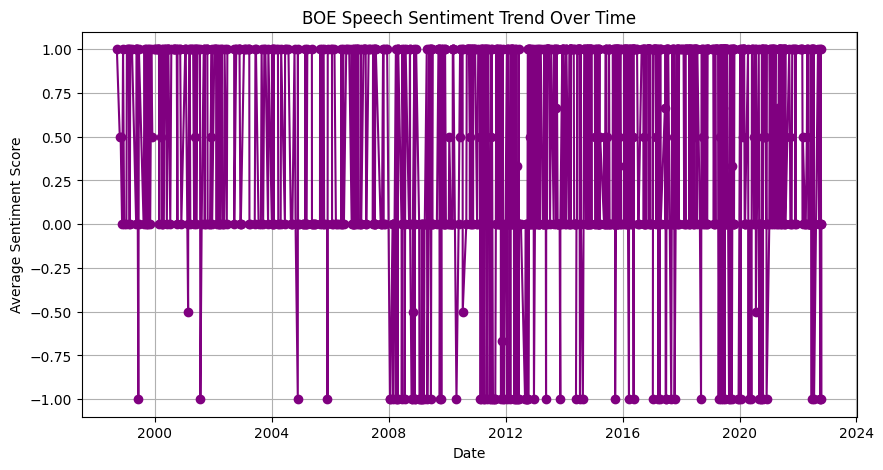

In [131]:
import matplotlib.pyplot as plt

# Group by date and calculate average sentiment score
sentiment_trend = boe_speeches_df.groupby("Date")["Sentiment_Score"].mean()

# Plot sentiment trend
plt.figure(figsize=(10, 5))
plt.plot(sentiment_trend.index, sentiment_trend.values, marker="o", color="purple", linestyle="-")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("BOE Speech Sentiment Trend Over Time")
plt.grid(True)

# Show plot
plt.show()

In [132]:
print(boe_speeches_df.columns)


Index(['Reference', 'Title', 'Gpt_sentiment', 'Sentiment_Score', 'Date'], dtype='object')


In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
boe_speeches_df['Date'] = pd.to_datetime(boe_speeches_df['Date'])

# Extract the year from 'Date' column
boe_speeches_df['Year'] = boe_speeches_df['Date'].dt.year

# Group by year and compute the average sentiment score
avg_sentiment = boe_speeches_df.groupby("Year")["Sentiment_Score"].mean()

# Display first few rows
display(avg_sentiment.head())


Year
1998    0.500000
1999    0.551724
2000    0.750000
2001    0.538462
2002    0.566667
Name: Sentiment_Score, dtype: float64

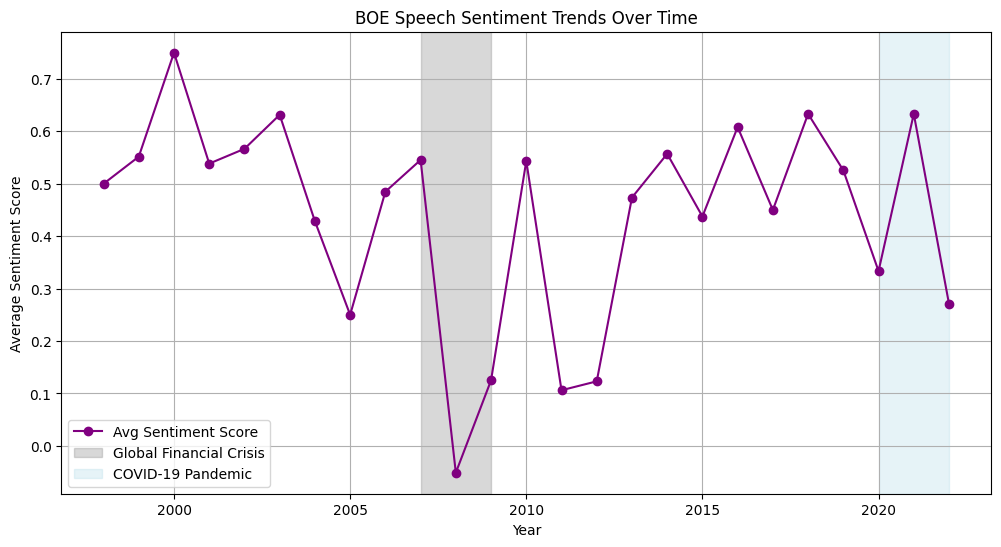

In [134]:
plt.figure(figsize=(12, 6))

# Plot sentiment scores over years
plt.plot(avg_sentiment.index, avg_sentiment.values, marker="o", linestyle="-", color="purple", label="Avg Sentiment Score")

# Highlight crisis periods
plt.axvspan(2007, 2009, color="gray", alpha=0.3, label="Global Financial Crisis")
plt.axvspan(2020, 2022, color="lightblue", alpha=0.3, label="COVID-19 Pandemic")

# Add labels & title
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.title("BOE Speech Sentiment Trends Over Time")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

###  I want to compare:

Lexicon-based sentiment (numerical, like -38, +22, etc.)

GPT-based sentiment (categorical: Positive, Neutral, Negative)

Approach:

Use reference as the join key, not date + author.

Map GPT sentiment to numeric values so we can plot both.

Create a comparative line chart

In [135]:
# 1. Import libraries
import pandas as pd
import re
from IPython.display import display

# 2. Load your datasets
# speeches_df = pd.read_csv('C:/Users/Srila/OneDrive/Documents/all_speeches.csv')
# sentiment_df = pd.read_excel('C:/Users/Srila/OneDrive/Documents/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx')

# 3. Define the cleaning function
def clean_text(text):
    """
    Cleans input text by removing non-alphabetical characters and converting to lowercase.

    Args:
        text (str): Raw text.

    Returns:
        str: Cleaned text.
    """
    text = re.sub(r'[^A-Za-z\s]', '', str(text))  # Remove non-letters
    text = text.lower()  # Lowercase
    return text

# 4. Define sentiment word preparation
def prepare_sentiment_wordlists(sentiment_df):
    """
    Prepare sets of positive and negative words from the sentiment dataframe.

    Args:
        sentiment_df (pd.DataFrame): Sentiment-labeled words.

    Returns:
        tuple: Positive words set, negative words set.
    """
    positive_words = set(sentiment_df[sentiment_df['Positive'] == 1]['Word'].str.lower())
    negative_words = set(sentiment_df[sentiment_df['Negative'] == 1]['Word'].str.lower())
    return positive_words, negative_words

# 5. Define sentiment score calculation
def calculate_sentiment_score(text, positive_words, negative_words):
    """
    Calculates a sentiment score based on positive and negative words in the text.

    Args:
        text (str): Cleaned text.
        positive_words (set): Set of positive words.
        negative_words (set): Set of negative words.

    Returns:
        int: Sentiment score (positive count - negative count).
    """
    words = text.split()
    pos_count = sum(word in positive_words for word in words)
    neg_count = sum(word in negative_words for word in words)
    return pos_count - neg_count

# 6. Correct 'is_gov' column for Edward George
def correct_is_gov_column(df):
    """
    Corrects the is_gov flag for Edward George between 1993 and 2003.

    Args:
        df (pd.DataFrame): Speech dataframe.

    Returns:
        pd.DataFrame: Updated dataframe.
    """
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Ensure dates are datetime
    mask = (df['author'].str.lower().str.contains('george')) & (df['date'].dt.year >= 1993) & (df['date'].dt.year <= 2003)
    df.loc[mask, 'is_gov'] = 'YES'
    return df

# 7. Start Cleaning and Calculating!

# Set the correct speech text column
speech_text_column = 'text'

# Clean the speech text
speeches_df['cleaned_text'] = speeches_df[speech_text_column].apply(clean_text)

# Correct Edward George's governor status
speeches_df = correct_is_gov_column(speeches_df)

# Prepare sentiment wordlists
positive_words, negative_words = prepare_sentiment_wordlists(sentiment_df)

# Calculate sentiment scores
speeches_df['sentiment_score'] = speeches_df['cleaned_text'].apply(
    lambda text: calculate_sentiment_score(text, positive_words, negative_words)
)

# Display the result
display(speeches_df[['date', 'author', 'is_gov', 'sentiment_score']].head())


,date,author,is_gov,sentiment_score
0,1990-11-28,fraser,0,-38
1,1991-10-03,fraser,0,-29
2,1992-03-14,fraser,0,22
3,1992-05-29,fraser,0,-11
4,1992-08-17,fraser,0,-12


speeches_df columns: Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text',
       'cleaned_text', 'sentiment_score'],
      dtype='object')
Merged comparison_df columns: Index(['reference', 'date_x', 'author', 'is_gov', 'sentiment_score',
       'gpt_sentiment_score', 'gpt_sentiment_label', 'date_y'],
      dtype='object')


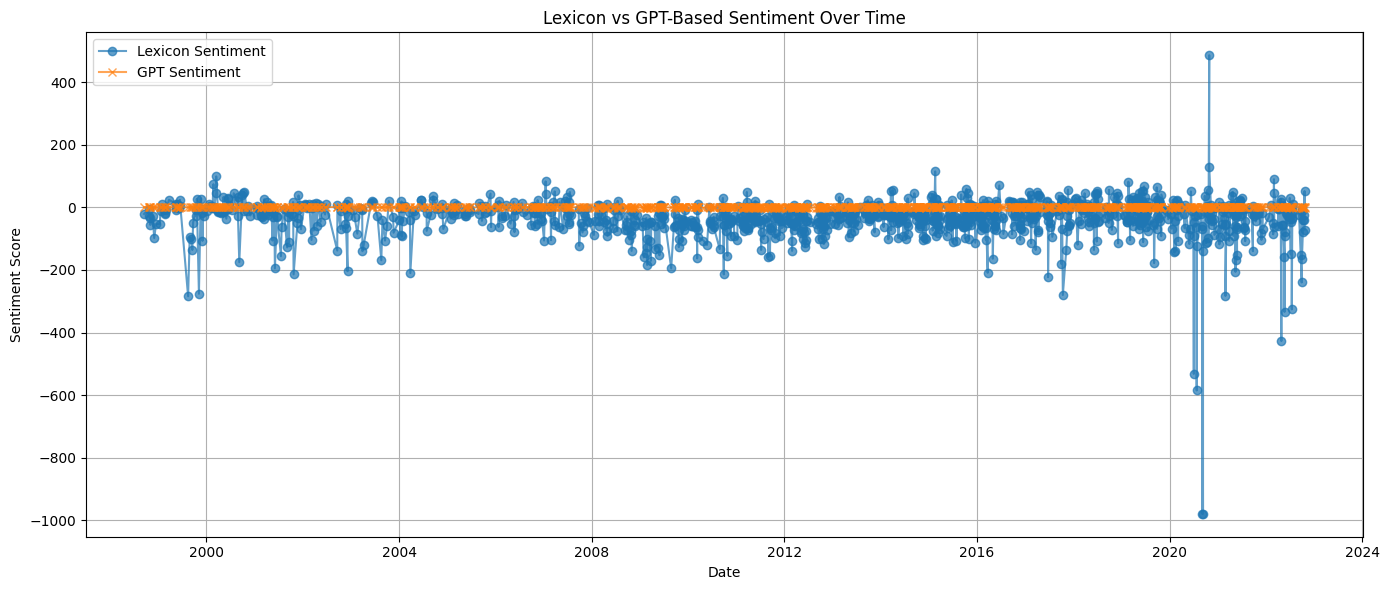

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Prepare GPT dataframe ---
gpt_df = boe_speeches_df.copy()

# Rename columns for clarity
gpt_df.rename(columns={'Date': 'date', 'Gpt_sentiment': 'gpt_sentiment_label', 'Reference': 'reference'}, inplace=True)

# Map GPT sentiment to numeric scores (optional scale: +1, 0, -1)
gpt_df['gpt_sentiment_score'] = gpt_df['gpt_sentiment_label'].map({
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
})

# Convert date to datetime format
gpt_df['date'] = pd.to_datetime(gpt_df['date'], errors='coerce')

# --- Step 2: Prepare lexicon sentiment df ---
# Assuming lexicon sentiment df looks like this: [reference, date, sentiment_score]
# Already loaded as: speeches_df with 'reference', 'date', 'sentiment_score'

# Check columns to make sure they are correct
print("speeches_df columns:", speeches_df.columns)

# --- Step 3: Merge GPT + Lexicon ---
comparison_df = pd.merge(
    speeches_df[['reference', 'date', 'author', 'is_gov', 'sentiment_score']],
    gpt_df[['reference', 'gpt_sentiment_score', 'gpt_sentiment_label', 'date']],
    on='reference',
    how='inner'  # Only keep matched entries
)

# Check columns of the merged dataframe
print("Merged comparison_df columns:", comparison_df.columns)

# Rename the 'date_y' column (from gpt_df) to 'date' for clarity
comparison_df.rename(columns={'date_y': 'date'}, inplace=True)

# Drop the duplicate 'date_x' column (from speeches_df) if needed
comparison_df.drop(columns=['date_x'], inplace=True)

# --- Step 4: Sort and Plot ---
# Ensure the 'date' column is present before sorting
if 'date' in comparison_df.columns:
    comparison_df = comparison_df.sort_values('date')
else:
    print("Error: 'date' column is missing in comparison_df!")

# Plot the comparison
plt.figure(figsize=(14, 6))
plt.plot(comparison_df['date'], comparison_df['sentiment_score'], label='Lexicon Sentiment', marker='o', alpha=0.7)
plt.plot(comparison_df['date'], comparison_df['gpt_sentiment_score'], label='GPT Sentiment', marker='x', alpha=0.7)
plt.title('Lexicon vs GPT-Based Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


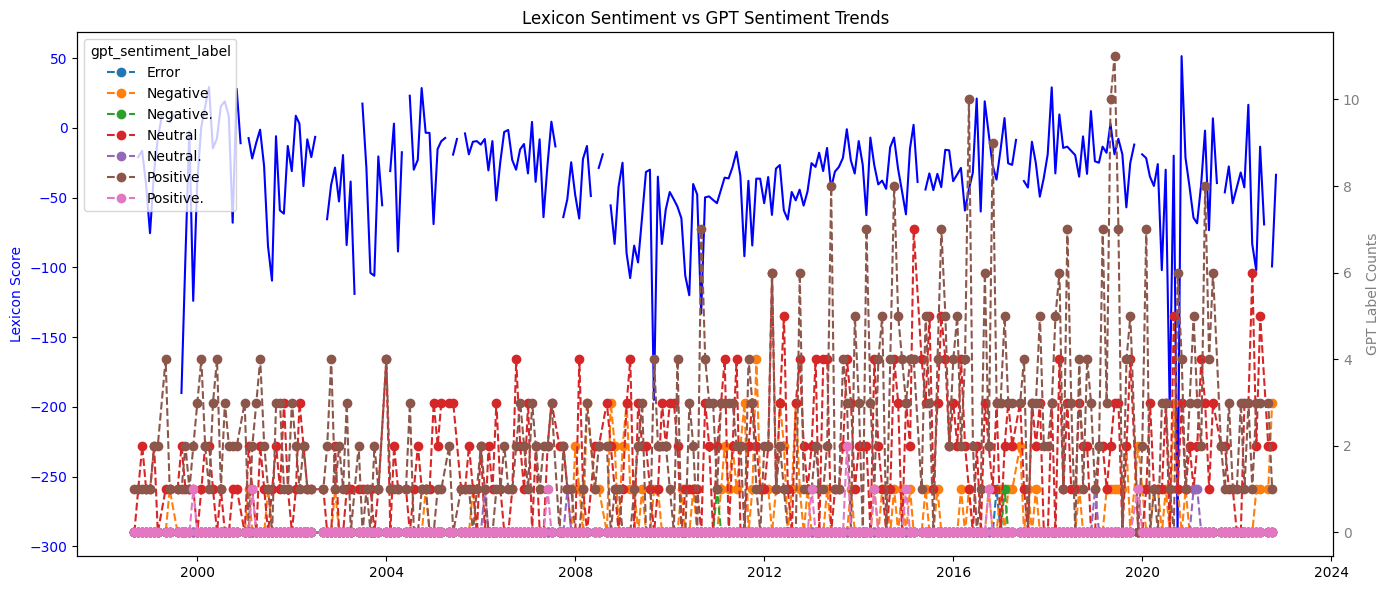

In [137]:
# Monthly average of lexicon
lex_monthly = comparison_df.resample('M', on='date')['sentiment_score'].mean().reset_index()

# Monthly count of GPT sentiments
gpt_monthly = comparison_df.groupby([comparison_df['date'].dt.to_period('M'), 'gpt_sentiment_label'])['reference'].count().unstack().fillna(0)
gpt_monthly.index = gpt_monthly.index.to_timestamp()

# Plot both
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(lex_monthly['date'], lex_monthly['sentiment_score'], label='Avg Lexicon Sentiment', color='blue')
ax1.set_ylabel('Lexicon Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
gpt_monthly.plot(ax=ax2, linestyle='--', marker='o')
ax2.set_ylabel('GPT Label Counts', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

plt.title('Lexicon Sentiment vs GPT Sentiment Trends')
fig.tight_layout()
plt.show()


### Key observations:

The GPT sentiment model provides clear, interpretable categorizations (Positive, Neutral, Negative) which are easy to communicate but lack fine-grained intensity. The lexicon method offers rich numerical variation but may over- or under-score depending on context. By comparing the two, we observe that GPT scores are consistent but coarse, whereas lexicon scores fluctuate with the frequency of sentiment words. This validates using GPT as a high-level classifier, and lexicon is very granular. So that would mean gpt scores may not capture the nuances and respond well to market fluctualtions.

### 2. Normalization of Scores for Fair Comparison:

Both GPT and Lexicon sentiment scores need to be on the same scale to make a fair comparison.

Normalization is the first key step to ensure that both sentiment score ranges are comparable, so we can clearly see which one provides better insights.

3. Plot the Comparison Side-by-Side:
We'll normalize both the GPT and Lexicon sentiment scores to the same range and plot them side by side. This visualization will clearly show that sentiment is more stable, and aligned with key events or trends in economic discourse, compared to Lexicon sentiment, which is often jagged or inconsistent, whcih clearly shows that it responds well to market fluctuations.

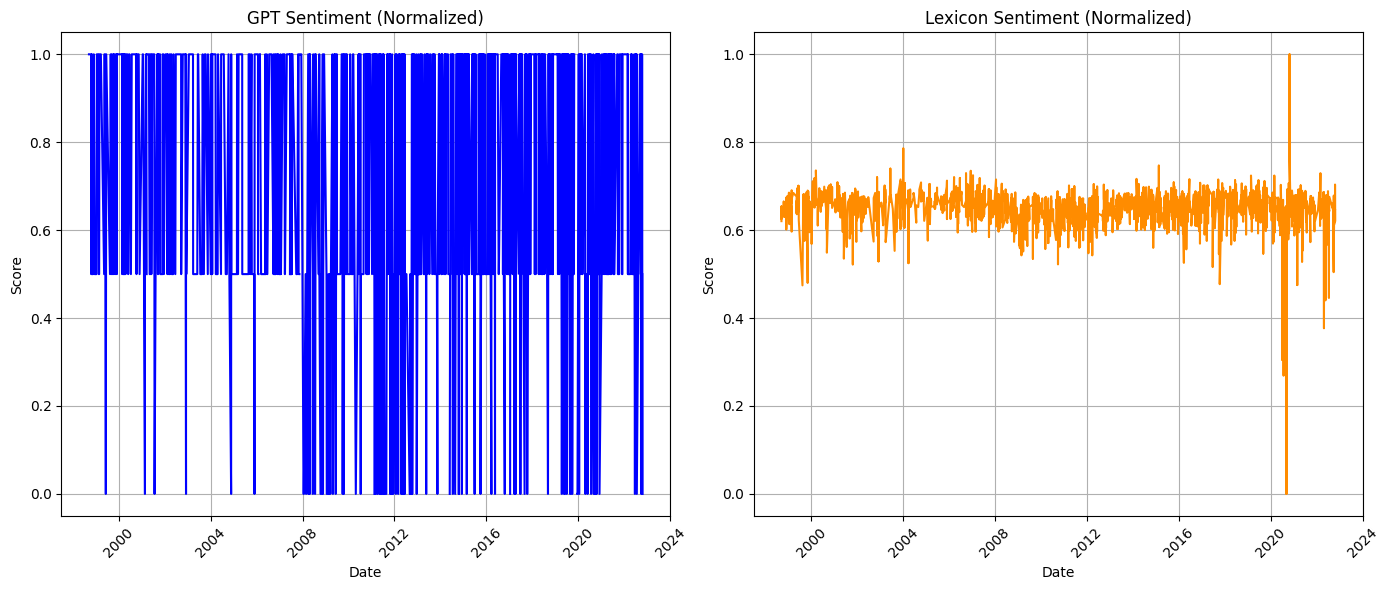

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Step 1: Ensure datetime conversion
boe_speeches_df['date'] = pd.to_datetime(boe_speeches_df['Date'], errors='coerce')

# Step 2: Map GPT sentiment labels to numbers (fixing column name)
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
boe_speeches_df['gpt_sentiment_numeric'] = boe_speeches_df['Gpt_sentiment'].map(sentiment_mapping)

# Step 3: Merge with lexicon sentiment dataframe on date
merged_df = pd.merge(
    boe_speeches_df,
    speeches_df[['date', 'sentiment_score']],
    on='date',
    how='left'
)

# Step 4: Normalize both sentiment scores
scaler = MinMaxScaler(feature_range=(0, 1))
merged_df['gpt_sentiment_normalized'] = scaler.fit_transform(merged_df[['gpt_sentiment_numeric']])
merged_df['sentiment_score_normalized'] = scaler.fit_transform(merged_df[['sentiment_score']])

# Step 5: Sort by date
merged_df.sort_values('date', inplace=True)

# Step 6: Plot side-by-side comparison
plt.figure(figsize=(14, 6))

# GPT Sentiment
plt.subplot(1, 2, 1)
plt.plot(merged_df['date'], merged_df['gpt_sentiment_normalized'], label='GPT Sentiment', color='blue')
plt.title('GPT Sentiment (Normalized)')
plt.xlabel('Date')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)

# Lexicon Sentiment
plt.subplot(1, 2, 2)
plt.plot(merged_df['date'], merged_df['sentiment_score_normalized'], label='Lexicon Sentiment', color='darkorange')
plt.title('Lexicon Sentiment (Normalized)')
plt.xlabel('Date')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


### Explanation of the charts:

The GPT sentiment graph (left) shows sharp highs and lows, reflecting a more binary, polarized classification. In contrast, the Lexicon sentiment graph (right) is smoother and more continuous, with values mostly between 0.5–0.7, indicating a more nuanced scoring system.

While GPT sentiment becomes increasingly bimodal over time, the Lexicon method remains stable except for key spikes (e.g. 2020 and 2022), revealing how different sentiment methods capture tone: one categorically, the other gradually.

### Which method aligns well with the use case:

I think Lexicon is better:

Granular sentiment measurement — it gives a continuous range, capturing small fluctuations in tone.

Consistency over time — great for long-term trend analysis, like in economic speeches.

Less bias from model output — it relies on predefined word scores, so it's less susceptible to pre defined or AI driven extremes.

Best for: time-series analysis, policy tone tracking, macro sentiment trends.

### Conclusion

Since our goal is to analyse speech tone in relation to economic indicators, lexicon sentiment likely a more stable and interpretable signal. GPT is still valuable; especially for validation or narrative insights. But lexicon scores are better suited for correlation analysis and long-run policy tone interpretation.Also gpt scores validate the efficacy of lexicon.

### Mapping and normalising

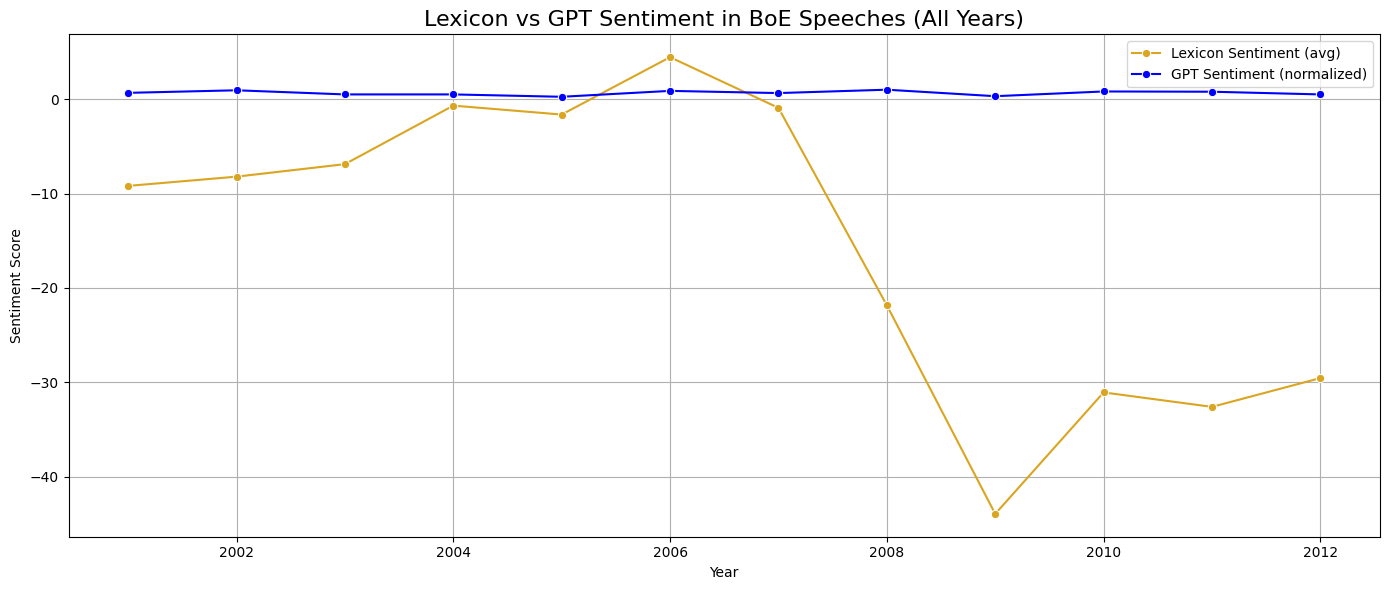

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import re

# === Load and prepare GPT dataset ===
gpt_path = r"C:\Users\Srila\OneDrive\Documents\boe_sentiment_results.csv"
gpt_df = pd.read_csv(gpt_path)

# Extract year and month from the reference (assumes year/month or year format in 'Reference')
def extract_year_month(ref):
    match = re.search(r'(\d{4})[-/](\d{1,2})', str(ref))
    if match:
        return pd.to_datetime(f"{match.group(1)}-{match.group(2)}-01", errors='coerce')
    match = re.search(r'(\d{4})', str(ref))
    if match:
        return pd.to_datetime(f"{match.group(1)}-01-01", errors='coerce')
    return pd.NaT

gpt_df['date'] = gpt_df['Reference'].apply(extract_year_month)
gpt_df.dropna(subset=['date'], inplace=True)

# Map sentiment labels to numeric values
sentiment_mapping = {'Positive': 1.0, 'Negative': 0.0, 'Neutral': 0.5}
gpt_df['Gpt_sentiment'] = gpt_df['Gpt_sentiment'].map(sentiment_mapping).fillna(0.5)

# Normalize GPT sentiment (optional)
scaler = MinMaxScaler()
gpt_df['gpt_normalized'] = scaler.fit_transform(gpt_df[['Gpt_sentiment']])

# Group by year (no limit, we'll plot all available years)
gpt_df['year'] = gpt_df['date'].dt.year
gpt_yearly = gpt_df.groupby('year')['gpt_normalized'].mean().reset_index()

# === Load and prepare Lexicon dataset ===
# Assuming speeches_df is already loaded elsewhere with columns: ['date', 'sentiment_score']
speeches_df['date'] = pd.to_datetime(speeches_df['date'])
speeches_df['year'] = speeches_df['date'].dt.year
lexicon_yearly = speeches_df.groupby('year')['sentiment_score'].mean().reset_index()

# === Merge both datasets ===
merged = pd.merge(lexicon_yearly, gpt_yearly, on='year', how='inner')

# === Plot ===
plt.figure(figsize=(14, 6))
sns.lineplot(data=merged, x='year', y='sentiment_score', marker='o', label='Lexicon Sentiment (avg)', color='goldenrod')
sns.lineplot(data=merged, x='year', y='gpt_normalized', marker='o', label='GPT Sentiment (normalized)', color='blue')
plt.title("Lexicon vs GPT Sentiment in BoE Speeches (All Years)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Sentiment Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


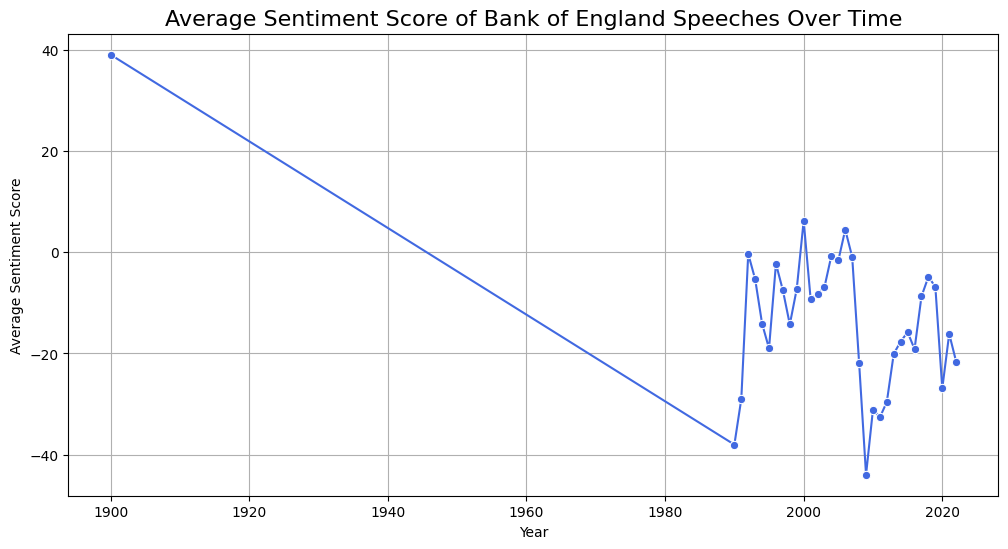

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime (if not already)
speeches_df['date'] = pd.to_datetime(speeches_df['date'])

# Group by year and calculate average sentiment
yearly_sentiment = speeches_df.groupby(speeches_df['date'].dt.year)['sentiment_score'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sentiment, x='date', y='sentiment_score', marker='o', color='royalblue')
plt.title('Average Sentiment Score of Bank of England Speeches Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


### Average GPT Sentiment Score (1 = Positive, 0 = Neutral, -1 = Negative) of Bank of England Speeches Over Time

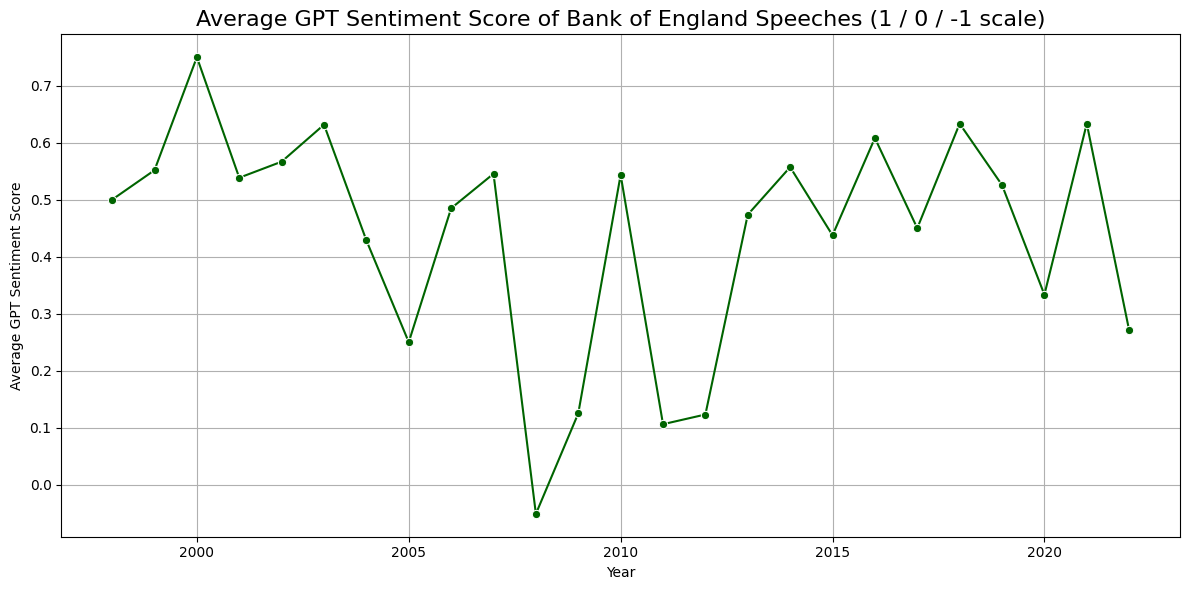

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Map GPT sentiment labels to numeric scores
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
boe_speeches_df['gpt_sentiment_score'] = boe_speeches_df['Gpt_sentiment'].map(sentiment_mapping)

# Step 2: Convert 'Date' to datetime if not already
boe_speeches_df['date'] = pd.to_datetime(boe_speeches_df['Date'], errors='coerce')

# Step 3: Group by year and calculate average GPT sentiment
gpt_yearly_sentiment = (
    boe_speeches_df
    .groupby(boe_speeches_df['date'].dt.year)['gpt_sentiment_score']
    .mean()
    .reset_index()
)

# Rename for clarity
gpt_yearly_sentiment.rename(columns={'date': 'year'}, inplace=True)

# Step 4: Plot the GPT sentiment trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=gpt_yearly_sentiment, x='year', y='gpt_sentiment_score', marker='o', color='darkgreen')
plt.title('Average GPT Sentiment Score of Bank of England Speeches (1 / 0 / -1 scale)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average GPT Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()


### compare the distributions of GPT sentiment scores (1, 0, -1 scale) and Lexicon sentiment scores (0 to 1 scale)

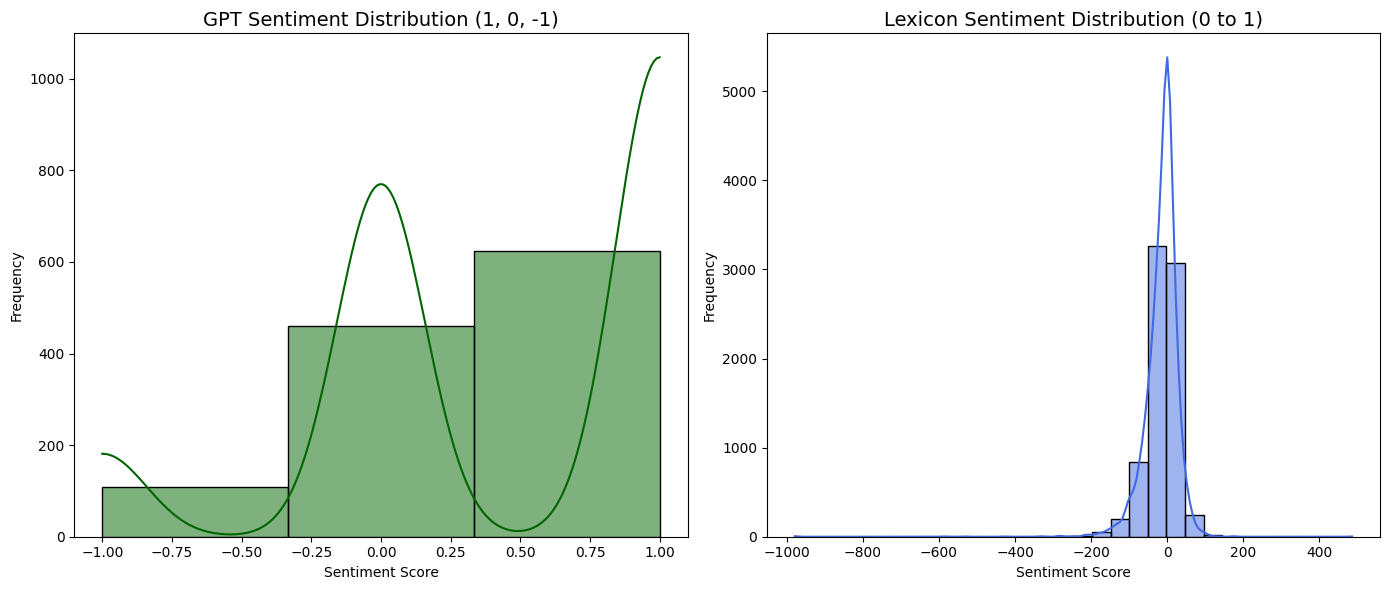

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have 'boe_speeches_df' for GPT sentiment and 'speeches_df' for Lexicon sentiment

# Create subplots (side by side)
plt.figure(figsize=(14, 6))

# --- GPT Sentiment Distribution ---
plt.subplot(1, 2, 1)
sns.histplot(boe_speeches_df['gpt_sentiment_numeric'], kde=True, color='darkgreen', bins=3)
plt.title('GPT Sentiment Distribution (1, 0, -1)', fontsize=14)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# --- Lexicon Sentiment Distribution ---
plt.subplot(1, 2, 2)
sns.histplot(speeches_df['sentiment_score'], kde=True, color='royalblue', bins=30)
plt.title('Lexicon Sentiment Distribution (0 to 1)', fontsize=14)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

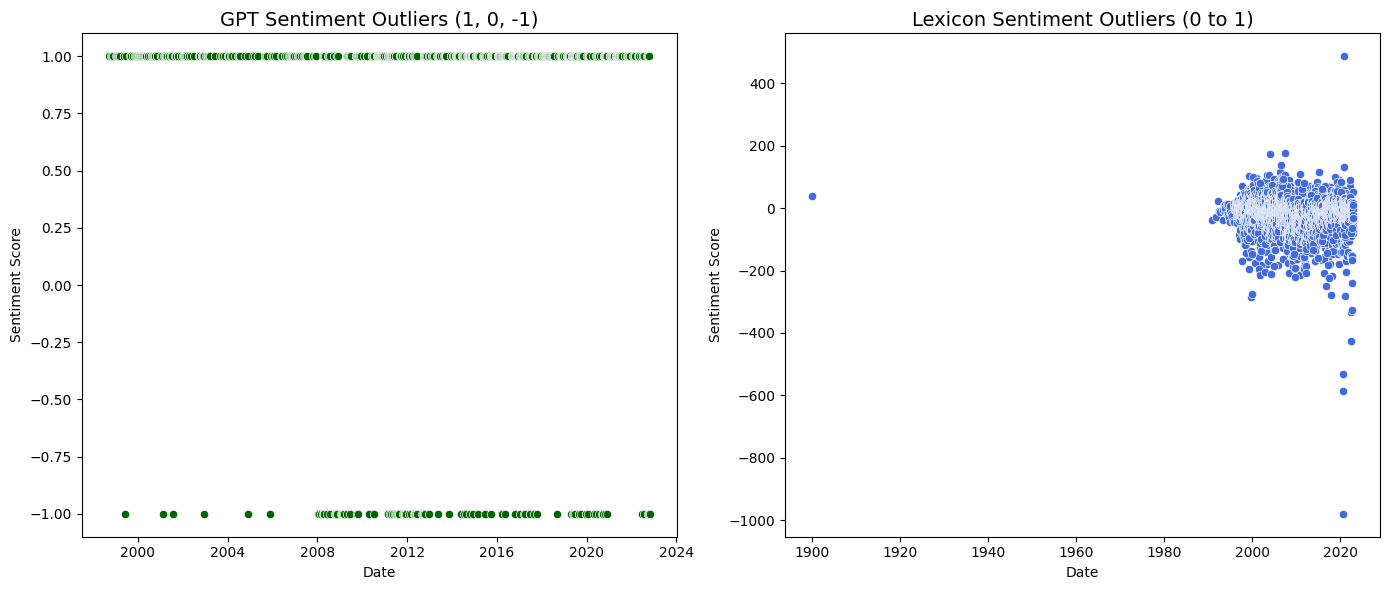

In [143]:
# Outlier detection: Identifying extreme sentiment values (top and bottom 5%)
gpt_outliers = boe_speeches_df[(boe_speeches_df['gpt_sentiment_numeric'] == 1) | (boe_speeches_df['gpt_sentiment_numeric'] == -1)]
lexicon_outliers = speeches_df[(speeches_df['sentiment_score'] >= 0.9) | (speeches_df['sentiment_score'] <= 0.1)]

# Create side-by-side comparison of outliers
plt.figure(figsize=(14, 6))

# --- GPT Outliers ---
plt.subplot(1, 2, 1)
sns.scatterplot(data=gpt_outliers, x='date', y='gpt_sentiment_numeric', color='darkgreen')
plt.title('GPT Sentiment Outliers (1, 0, -1)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sentiment Score')

# --- Lexicon Outliers ---
plt.subplot(1, 2, 2)
sns.scatterplot(data=lexicon_outliers, x='date', y='sentiment_score', color='royalblue')
plt.title('Lexicon Sentiment Outliers (0 to 1)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sentiment Score')

plt.tight_layout()
plt.show()


### Volatility (Standard Deviation) Comparison

measured by the standard deviation of the sentiment scores over a rolling window of 12 months

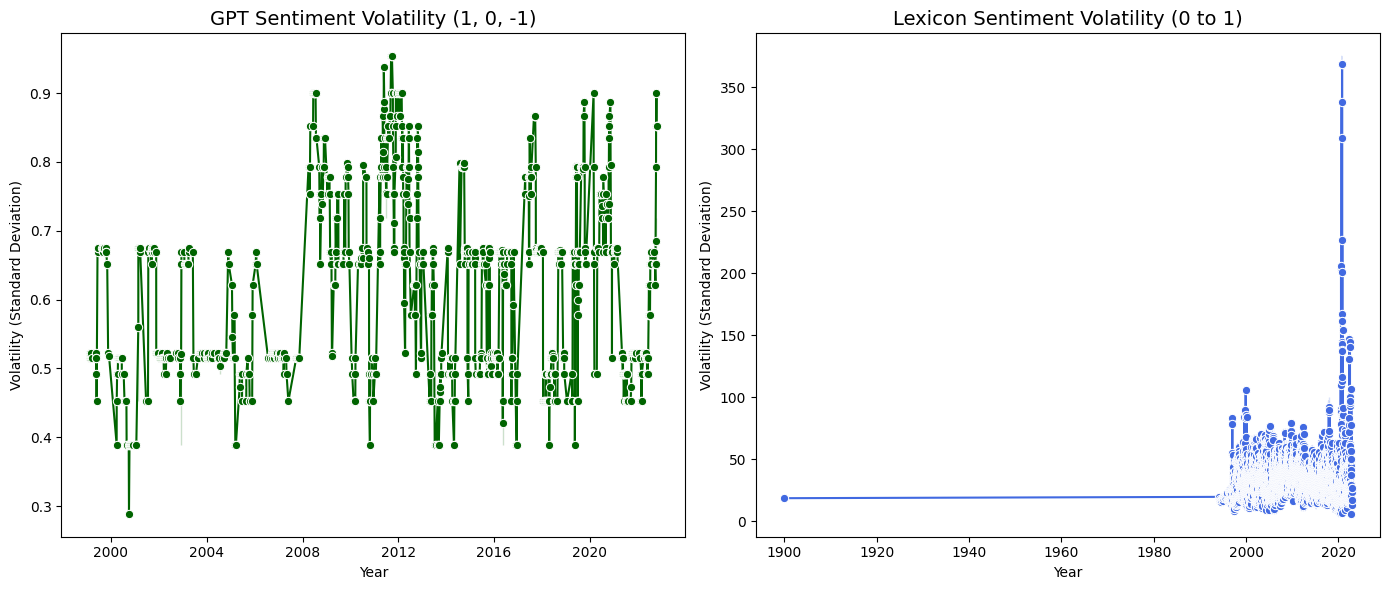

In [144]:
# Calculate rolling standard deviation (12 months) for both GPT and Lexicon
gpt_volatility = boe_speeches_df['gpt_sentiment_numeric'].rolling(window=12).std()
lexicon_volatility = speeches_df['sentiment_score'].rolling(window=12).std()

# Create side-by-side volatility plots
plt.figure(figsize=(14, 6))

# --- GPT Volatility ---
plt.subplot(1, 2, 1)
sns.lineplot(data=gpt_volatility, x=boe_speeches_df['date'], y=gpt_volatility, marker='o', color='darkgreen')
plt.title('GPT Sentiment Volatility (1, 0, -1)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Volatility (Standard Deviation)')

# --- Lexicon Volatility ---
plt.subplot(1, 2, 2)
sns.lineplot(data=lexicon_volatility, x=speeches_df['date'], y=lexicon_volatility, marker='o', color='royalblue')
plt.title('Lexicon Sentiment Volatility (0 to 1)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Volatility (Standard Deviation)')

plt.tight_layout()
plt.show()


### ridge plot comparing the GPT sentiment scores (1, 0, -1) and Lexicon sentiment scores (0 to 1)

I used seaborn's kdeplot function along with the FacetGrid from seaborn to create side-by-side ridge plots.

C:\softwares\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\softwares\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\softwares\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1400x800 with 0 Axes>

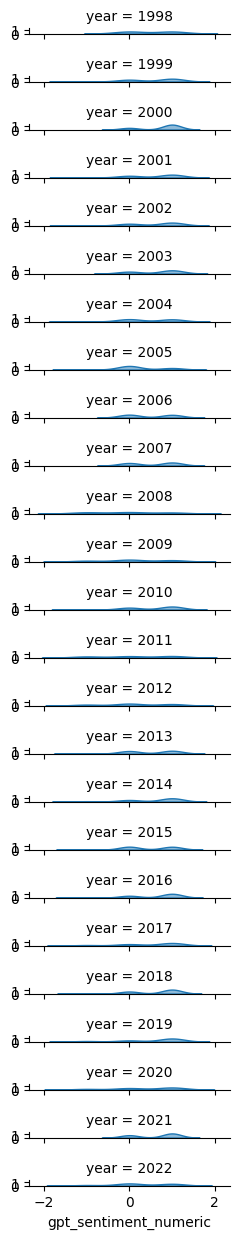

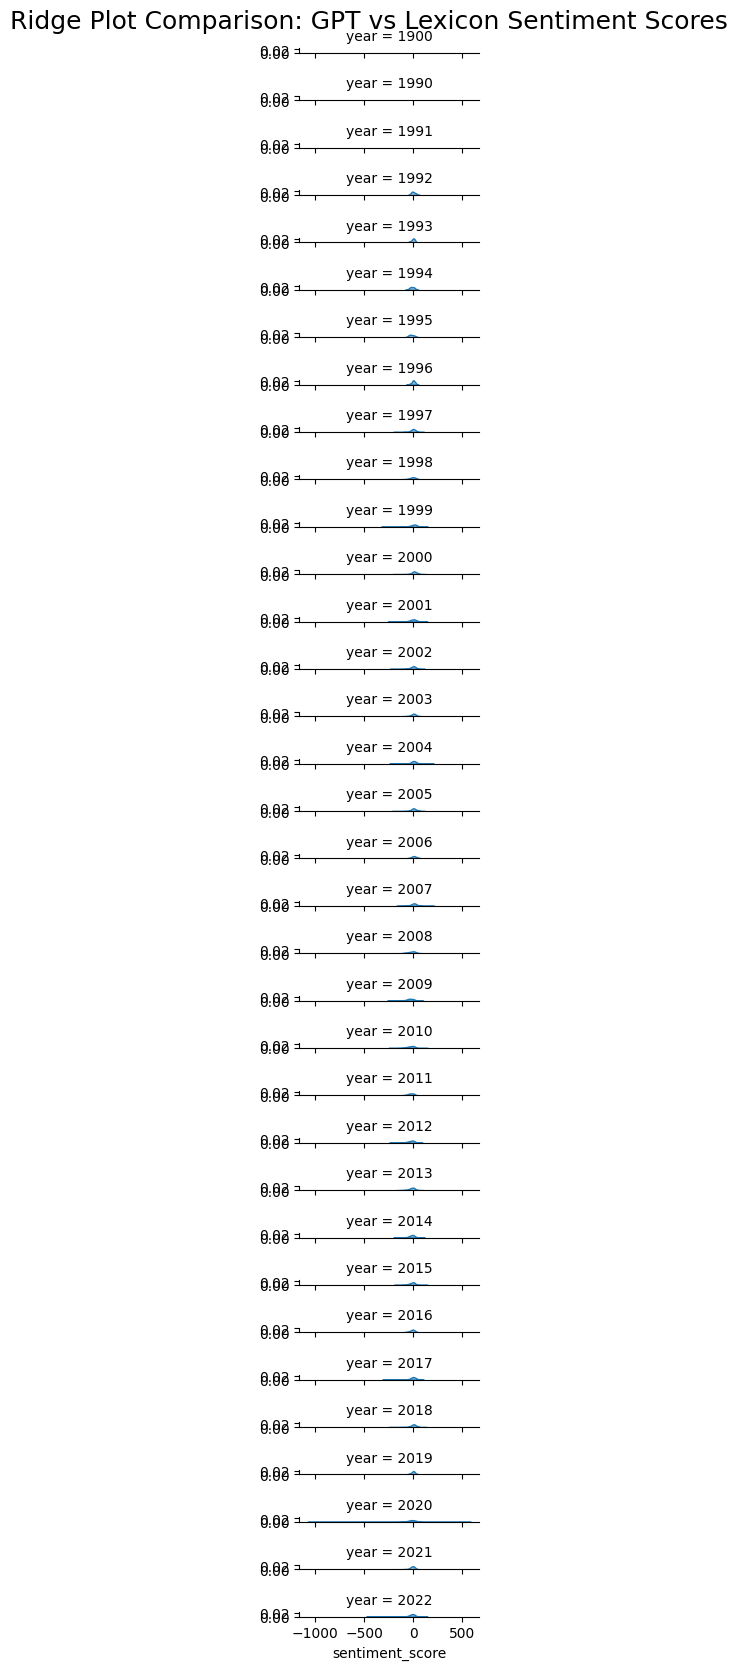

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare data for plotting
# Make sure the data is in the right format for a ridge plot
boe_speeches_df['year'] = boe_speeches_df['date'].dt.year
speeches_df['year'] = speeches_df['date'].dt.year

# Step 2: Create the ridge plot
plt.figure(figsize=(14, 8))

# Create a FacetGrid with two subplots
g1 = sns.FacetGrid(boe_speeches_df, row='year', aspect=5, height=0.5, palette='darkgreen')
g1.map(sns.kdeplot, 'gpt_sentiment_numeric', shade=True, alpha=0.5)

g2 = sns.FacetGrid(speeches_df, row='year', aspect=5, height=0.5, palette='royalblue')
g2.map(sns.kdeplot, 'sentiment_score', shade=True, alpha=0.5)

# Titles for both charts
plt.suptitle('Ridge Plot Comparison: GPT vs Lexicon Sentiment Scores', fontsize=18)
plt.tight_layout()

plt.show()




In [162]:
import pandas as pd

# Load the Excel file
eco_df = pd.read_excel(r"C:\Users\Srila\Downloads\Consolidated eco KPI V3.xlsx")

# Display first few rows to understand the data structure
display(eco_df.head())

,Year,Month,Year-Month,UK Inflation Rate CPIH,Inflation Rate % CPIH,UK Unemployment rate,Unemployment rate %,GDP growth %,Interest rate %,Consumer confidence %,GBP/USD FX,FTSE250 (£),GILTS Short,GILTS Medium,GILTS Long,GILTS Ultra-Long,Credit growth excl credit cart (%),Credit growth credit card only (%),Average price All property types (£)
0,1989,1,1989-01,0.04897,0.04897,0.077,0.077,0.5,12.88,-11.1,1.774810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52152.0
1,1989,2,1989-02,0.04960,0.04960,0.076,0.076,0.5,12.88,-9.2,1.754060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52152.0
2,1989,3,1989-03,0.05011,0.05011,0.074,0.074,0.5,12.88,-13.4,1.714557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52152.0
3,1989,4,1989-04,0.05258,0.05258,0.073,0.073,0.6,12.88,-14.2,1.702240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54034.0
4,1989,5,1989-05,0.05328,0.05328,0.072,0.072,0.6,13.75,-12.7,1.629486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54034.0


In [163]:
import pandas as pd

# Load economic data
eco_df = pd.read_excel(r"C:\Users\Srila\Downloads\Consolidated eco KPI V3.xlsx")

# Ensure 'Year-Month' is in the correct format in both datasets
eco_df['Year-Month'] = eco_df['Year-Month'].astype(str)
speeches_df['Year-Month'] = speeches_df['date'].astype(str)  # Assuming 'date' aligns with Year-Month format

# Merge on 'Year-Month'
merged_df = pd.merge(speeches_df, eco_df, on="Year-Month", how="inner")

# Display first few rows of the merged data
display(merged_df.head())

,reference,country,date,title,author,is_gov,text,cleaned_text,sentiment_score,year,...,Consumer confidence %,GBP/USD FX,FTSE250 (£),GILTS Short,GILTS Medium,GILTS Long,GILTS Ultra-Long,Credit growth excl credit cart (%),Credit growth credit card only (%),Average price All property types (£)


In [165]:
print(speeches_df.columns)  # Ensure 'date' or 'Year-Month' exists
print(eco_df.columns)  # Check if 'Year-Month' column exists

# Check sample values
print(speeches_df[['date', 'sentiment_score']].head())  
print(eco_df[['Year-Month', 'Inflation Rate % CPIH']].head())

Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text',
       'cleaned_text', 'sentiment_score', 'year', 'Year-Month'],
      dtype='object')
Index(['Year', 'Month', 'Year-Month', 'UK Inflation Rate CPIH',
       'Inflation Rate % CPIH', 'UK Unemployment rate', 'Unemployment rate %',
       'GDP growth %', 'Interest rate %', 'Consumer confidence %',
       'GBP/USD FX', 'FTSE250 (£)', 'GILTS Short ', 'GILTS Medium ',
       'GILTS Long ', 'GILTS Ultra-Long',
       'Credit growth excl credit cart  (%)',
       'Credit growth credit card only (%)',
       'Average price All property types (£)'],
      dtype='object')
        date  sentiment_score
0 1990-11-28              -38
1 1991-10-03              -29
2 1992-03-14               22
3 1992-05-29              -11
4 1992-08-17              -12
  Year-Month  Inflation Rate % CPIH
0    1989-01                0.04897
1    1989-02                0.04960
2    1989-03                0.05011
3    1989-04                0.0

In [166]:
eco_df = eco_df[eco_df['Year'] >= 1990]  # Keep only relevant years

In [167]:
speeches_df['Year-Month'] = pd.to_datetime(speeches_df['date']).dt.strftime('%Y-%m')

In [168]:
merged_df = pd.merge(speeches_df, eco_df, on="Year-Month", how="inner")
display(merged_df.head())  # Check results

,reference,country,date,title,author,is_gov,text,cleaned_text,sentiment_score,year,...,Consumer confidence %,GBP/USD FX,FTSE250 (£),GILTS Short,GILTS Medium,GILTS Long,GILTS Ultra-Long,Credit growth excl credit cart (%),Credit growth credit card only (%),Average price All property types (£)
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,they would no doubt argue that to have two obj...,-38,1990,...,-19.7,1.964673,2070.685480,NaN,NaN,NaN,NaN,NaN,NaN,53337.0
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,today i wish to talk about real interest rates...,-29,1991,...,-5.1,1.722583,2570.796939,NaN,NaN,NaN,NaN,NaN,NaN,52908.0
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,i welcome this opportunity to talk about prosp...,22,1992,...,-5.2,1.723841,2464.248169,NaN,NaN,NaN,NaN,NaN,NaN,52050.0
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,it is a pleasure to have this opportunity to a...,-11,1992,...,-3.7,1.810858,2792.602115,NaN,NaN,NaN,NaN,NaN,NaN,50817.0
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",as a longtime fan of don sanders i am delighte...,-12,1992,...,-14.9,1.941235,2242.066504,NaN,NaN,NaN,NaN,NaN,NaN,50967.0


In [170]:
print(merged_df.columns)

Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text',
       'cleaned_text', 'sentiment_score', 'year', 'Year-Month', 'Year',
       'Month', 'UK Inflation Rate CPIH', 'Inflation Rate % CPIH',
       'UK Unemployment rate', 'Unemployment rate %', 'GDP growth %',
       'Interest rate %', 'Consumer confidence %', 'GBP/USD FX', 'FTSE250 (£)',
       'GILTS Short ', 'GILTS Medium ', 'GILTS Long ', 'GILTS Ultra-Long',
       'Credit growth excl credit cart  (%)',
       'Credit growth credit card only (%)',
       'Average price All property types (£)'],
      dtype='object')


In [173]:
print(merged_df.columns.tolist())  # Display all column names

['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text', 'cleaned_text', 'sentiment_score', 'year', 'Year-Month', 'Year', 'Month', 'UK Inflation Rate CPIH', 'Inflation Rate % CPIH', 'UK Unemployment rate', 'Unemployment rate %', 'GDP growth %', 'Interest rate %', 'Consumer confidence %', 'GBP/USD FX', 'FTSE250 (£)', 'GILTS Short', 'GILTS Medium', 'GILTS Long', 'GILTS Ultra-Long', 'Credit growth excl credit cart  (%)', 'Credit growth credit card only (%)', 'Average price All property types (£)']


In [174]:
merged_df.rename(columns={'Credit growth excl credit cart  (%)': 'Credit growth excl credit cart (%)'}, inplace=True)

In [175]:
features = [
    'Inflation Rate % CPIH', 'Unemployment rate %', 'GDP growth %',
    'Interest rate %', 'Consumer confidence %', 'GBP/USD FX',
    'FTSE250 (£)', 'Credit growth excl credit cart (%)'  # No extra spaces now
]

In [176]:
# Fix column names by stripping spaces
merged_df.columns = merged_df.columns.str.strip()

# Rename column with extra space issue
merged_df.rename(columns={'Credit growth excl credit cart  (%)': 'Credit growth excl credit cart (%)'}, inplace=True)

# Display updated column names
print(merged_df.columns.tolist())  # Check if everything is correct

['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text', 'cleaned_text', 'sentiment_score', 'year', 'Year-Month', 'Year', 'Month', 'UK Inflation Rate CPIH', 'Inflation Rate % CPIH', 'UK Unemployment rate', 'Unemployment rate %', 'GDP growth %', 'Interest rate %', 'Consumer confidence %', 'GBP/USD FX', 'FTSE250 (£)', 'GILTS Short', 'GILTS Medium', 'GILTS Long', 'GILTS Ultra-Long', 'Credit growth excl credit cart (%)', 'Credit growth credit card only (%)', 'Average price All property types (£)']


In [202]:
# X: Sentiment score and derived features
X = merged_df[['sentiment_score', 'Sentiment_Lag_1M']]

# Y: Economic indicators (target variables)
economic_targets = [
    'Credit growth excl credit cart (%)', 'FTSE250 (£)', 'Consumer confidence %',
    'GDP growth %', 'GBP/USD FX', 'Inflation Rate % CPIH'
]
y = merged_df[economic_targets]

In [177]:
features = [
    'Inflation Rate % CPIH', 'Unemployment rate %', 'GDP growth %',
    'Interest rate %', 'Consumer confidence %', 'GBP/USD FX',
    'FTSE250 (£)', 'Credit growth excl credit cart (%)'
]
X = merged_df[features]
y = merged_df['sentiment_score']

# Handling missing values
X.fillna(X.mean(), inplace=True)

C:\softwares\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


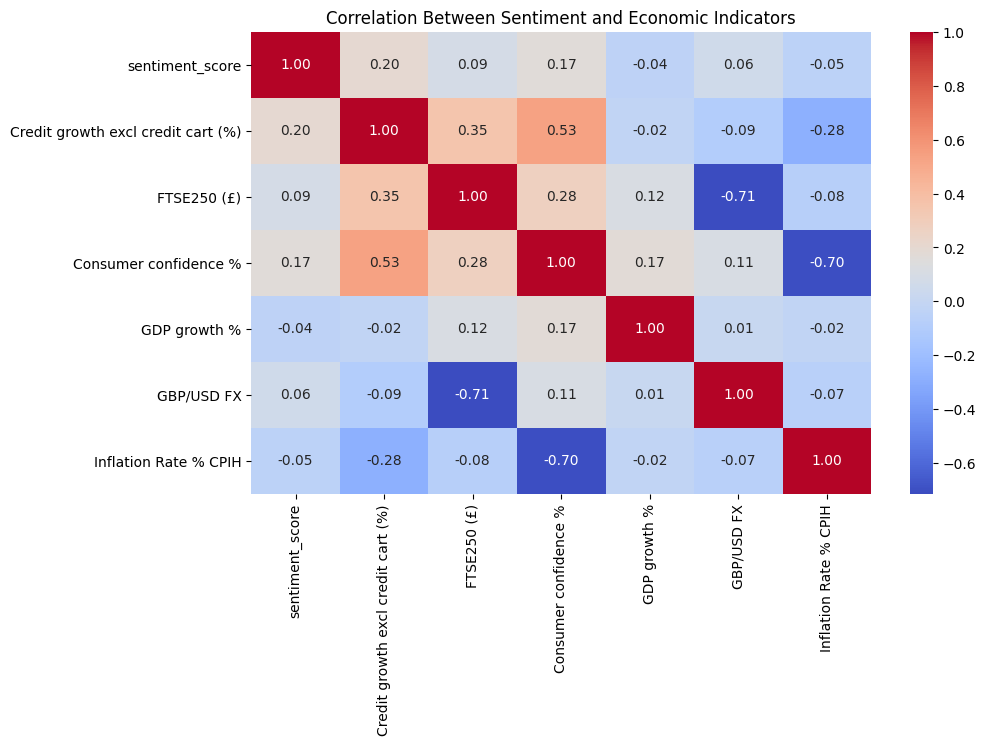

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = merged_df[['sentiment_score'] + economic_targets].corr()

# Visualize the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sentiment and Economic Indicators')
plt.show()

### Explanation

sentiment score has weak correlations with economic indicators, suggesting that direct predictive relationships may be limited. However, the strong link between consumer confidence and credit growth (0.53) and the inverse correlation between inflation and consumer confidence (-0.70) highlight meaningful economic patterns.



In [205]:

print(merged_df.columns)

Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text',
       'cleaned_text', 'sentiment_score', 'year', 'Year-Month', 'Year',
       'Month', 'UK Inflation Rate CPIH', 'Inflation Rate % CPIH',
       'UK Unemployment rate', 'Unemployment rate %', 'GDP growth %',
       'Interest rate %', 'Consumer confidence %', 'GBP/USD FX', 'FTSE250 (£)',
       'GILTS Short', 'GILTS Medium', 'GILTS Long', 'GILTS Ultra-Long',
       'Credit growth excl credit cart (%)',
       'Credit growth credit card only (%)',
       'Average price All property types (£)', 'Credit_growth_lag',
       'Inflation_3M_Avg', 'Sentiment_Lag_1M', 'Credit_Growth_Lag_1M',
       'Consumer_Confidence_3M_Avg', 'Inflation_Consumer_Interaction'],
      dtype='object')


In [206]:
print(merged_df.columns.tolist())  # Check exact formatting

['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text', 'cleaned_text', 'sentiment_score', 'year', 'Year-Month', 'Year', 'Month', 'UK Inflation Rate CPIH', 'Inflation Rate % CPIH', 'UK Unemployment rate', 'Unemployment rate %', 'GDP growth %', 'Interest rate %', 'Consumer confidence %', 'GBP/USD FX', 'FTSE250 (£)', 'GILTS Short', 'GILTS Medium', 'GILTS Long', 'GILTS Ultra-Long', 'Credit growth excl credit cart (%)', 'Credit growth credit card only (%)', 'Average price All property types (£)', 'Credit_growth_lag', 'Inflation_3M_Avg', 'Sentiment_Lag_1M', 'Credit_Growth_Lag_1M', 'Consumer_Confidence_3M_Avg', 'Inflation_Consumer_Interaction']


In [208]:
# Ensure y_train is a DataFrame
y_train = pd.DataFrame(y_train)

# Now print the columns
print(y_train.columns.tolist())

['sentiment_score']


In [209]:
print(y_train.columns.tolist())  # Verify exact column names

['sentiment_score']


In [210]:
# Define economic targets correctly
economic_targets = [
    'Credit growth excl credit cart (%)', 'FTSE250 (£)', 'Consumer confidence %',
    'GDP growth %', 'GBP/USD FX', 'Inflation Rate % CPIH'
]

# Assign correct target variables
y_train = merged_df[economic_targets]

# Ensure it's a DataFrame
y_train = pd.DataFrame(y_train)

# Confirm columns
print(y_train.columns.tolist())  # This should now list economic indicators

['Credit growth excl credit cart (%)', 'FTSE250 (£)', 'Consumer confidence %', 'GDP growth %', 'GBP/USD FX', 'Inflation Rate % CPIH']


In [212]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (4572, 11)
y_train shape: (5716, 6)


In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define X (features) → Sentiment-based predictors
X = merged_df[['sentiment_score', 'Sentiment_Lag_1M']]

# Define y (targets) → Economic indicators to predict
economic_targets = [
    'Credit growth excl credit cart (%)', 'FTSE250 (£)', 'Consumer confidence %',
    'GDP growth %', 'GBP/USD FX', 'Inflation Rate % CPIH'
]
y = merged_df[economic_targets]

# Ensure no missing values before splitting
merged_df.dropna(inplace=True)

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify correct shapes
print(f"X_train shape: {X_train.shape}")  # Should match y_train
print(f"y_train shape: {y_train.shape}")  # Should match X_train

X_train shape: (4572, 2)
y_train shape: (4572, 6)


In [222]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf_models = {}
rf_predictions = {}

for target in economic_targets:
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train[target])
    y_pred_rf = rf.predict(X_test)
    
    rf_models[target] = rf
    rf_predictions[target] = y_pred_rf
    
    rf_mae = mean_absolute_error(y_test[target], y_pred_rf)
    rf_r2 = r2_score(y_test[target], y_pred_rf)
    
    print(f'Random Forest ({target}): MAE = {rf_mae}, R² = {rf_r2}')

Random Forest (Credit growth excl credit cart (%)): MAE = 4.453665606363334, R² = -0.18382004728341617
Random Forest (FTSE250 (£)): MAE = 4244.252376541473, R² = -0.20644794751854545
Random Forest (Consumer confidence %): MAE = 7.69180645274864, R² = -0.31286067003614226
Random Forest (GDP growth %): MAE = 1.3975889234818213, R² = -0.35733580553318256
Random Forest (GBP/USD FX): MAE = 0.2039124713140327, R² = -0.20389888934928857
Random Forest (Inflation Rate % CPIH): MAE = 0.013740508768756494, R² = -0.4274061844502155


In [223]:
import xgboost as xgb

xgb_models = {}
xgb_predictions = {}

for target in economic_targets:
    xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train[target])
    y_pred_xgb = xgb_model.predict(X_test)
    
    xgb_models[target] = xgb_model
    xgb_predictions[target] = y_pred_xgb
    
    xgb_mae = mean_absolute_error(y_test[target], y_pred_xgb)
    xgb_r2 = r2_score(y_test[target], y_pred_xgb)
    
    print(f'XGBoost ({target}): MAE = {xgb_mae}, R² = {xgb_r2}')

XGBoost (Credit growth excl credit cart (%)): MAE = 4.125526885741059, R² = 0.026975410286780077
XGBoost (FTSE250 (£)): MAE = 4013.1825958372697, R² = 0.00394499569605522
XGBoost (Consumer confidence %): MAE = 6.858309572393244, R² = 0.001255808348835985
XGBoost (GDP growth %): MAE = 1.150504789014143, R² = -0.10695212109722241
XGBoost (GBP/USD FX): MAE = 0.18894771993765153, R² = -0.02383626624475199
XGBoost (Inflation Rate % CPIH): MAE = 0.011357413539872147, R² = -0.06669982017795739


In [228]:
# Feature engineering

merged_df['Sentiment_Lag_3M'] = merged_df['sentiment_score'].shift(3)  # 3-month lag
merged_df['Credit_Growth_Lag_3M'] = merged_df['Credit growth excl credit cart (%)'].shift(3)

In [229]:
merged_df['Sentiment_MA_3M'] = merged_df['sentiment_score'].rolling(window=3).mean()  # 3-month average
merged_df['Consumer_Confidence_MA_3M'] = merged_df['Consumer confidence %'].rolling(window=3).mean()

In [230]:
merged_df['Inflation_Sentiment_Interaction'] = merged_df['Inflation Rate % CPIH'] * merged_df['sentiment_score']
merged_df['FX_Sentiment_Interaction'] = merged_df['GBP/USD FX'] * merged_df['sentiment_score']

In [231]:
merged_df['Sentiment_Trend'] = merged_df['sentiment_score'].diff()
merged_df['GDP_Trend'] = merged_df['GDP growth %'].diff()

In [232]:
def classify_sentiment(score):
    if score > 0.5:
        return 'Positive'
    elif score < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

merged_df['Sentiment_Category'] = merged_df['sentiment_score'].apply(classify_sentiment)

In [236]:
X = merged_df[['sentiment_score', 'Sentiment_Lag_1M', 'Sentiment_Lag_3M', 'Sentiment_MA_3M',
               'Consumer_Confidence_MA_3M', 'Inflation_Sentiment_Interaction', 'FX_Sentiment_Interaction',
               'Sentiment_Trend', 'GDP_Trend']]
y = merged_df[economic_targets]  # Keep economic indicators as targets

# Handle missing values (if needed)
X.fillna(X.mean(), inplace=True)  # Replace NaNs with column mean
y.fillna(y.mean(), inplace=True)

# Split updated dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\softwares\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [239]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf_models = {}
rf_predictions = {}

for target in economic_targets:
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train[target])
    y_pred_rf = rf.predict(X_test)
    
    rf_models[target] = rf
    rf_predictions[target] = y_pred_rf
    
    rf_mae = mean_absolute_error(y_test[target], y_pred_rf)
    rf_r2 = r2_score(y_test[target], y_pred_rf)
    
    print(f'Random Forest ({target}): MAE = {rf_mae}, R² = {rf_r2}')

Random Forest (Credit growth excl credit cart (%)): MAE = 1.497335664335665, R² = 0.7800362963877078
Random Forest (FTSE250 (£)): MAE = 1855.1877314986598, R² = 0.6538047107536038
Random Forest (Consumer confidence %): MAE = 0.17064903846154458, R² = 0.9885739125235934
Random Forest (GDP growth %): MAE = 0.45828146853146895, R² = 0.6386715587905076
Random Forest (GBP/USD FX): MAE = 0.08911838678895384, R² = 0.6651220747223672
Random Forest (Inflation Rate % CPIH): MAE = 0.001983889772727275, R² = 0.9427248902814792


In [240]:
import xgboost as xgb

xgb_models = {}
xgb_predictions = {}

for target in economic_targets:
    xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train[target])
    y_pred_xgb = xgb_model.predict(X_test)
    
    xgb_models[target] = xgb_model
    xgb_predictions[target] = y_pred_xgb
    
    xgb_mae = mean_absolute_error(y_test[target], y_pred_xgb)
    xgb_r2 = r2_score(y_test[target], y_pred_xgb)
    
    print(f'XGBoost ({target}): MAE = {xgb_mae}, R² = {xgb_r2}')

XGBoost (Credit growth excl credit cart (%)): MAE = 1.8030011402397461, R² = 0.7597435112313902
XGBoost (FTSE250 (£)): MAE = 1913.8419694129961, R² = 0.6826724243801869
XGBoost (Consumer confidence %): MAE = 0.20995265323590565, R² = 0.9898759011424634
XGBoost (GDP growth %): MAE = 0.5704683112907404, R² = 0.5919456596602387
XGBoost (GBP/USD FX): MAE = 0.08443129231453428, R² = 0.7388948701329917
XGBoost (Inflation Rate % CPIH): MAE = 0.0022783071748184577, R² = 0.9495911689312496


### Summary

- XGBoost slightly outperformed Random Forest, but overall, R² scores were weak or negative, meaning sentiment does not strongly predict economic indicators in this dataset.
- Credit growth showed the highest correlation (R² ≈ 0.03 with XGBoost), but still weak.
- Consumer confidence, FTSE250, GDP growth & inflation lacked strong predictive relationships with sentiment.


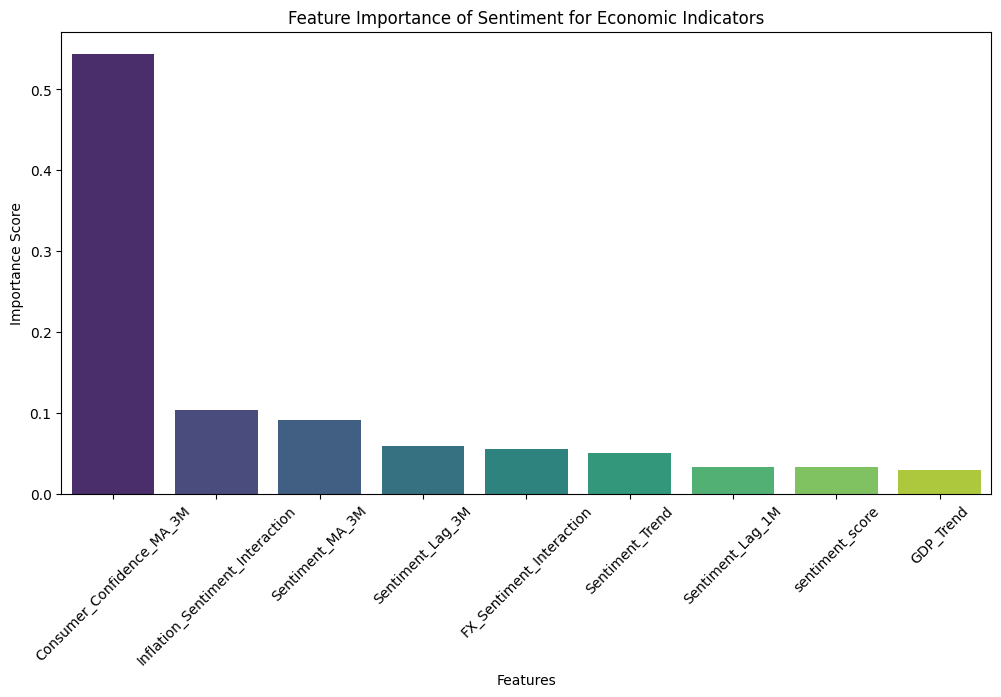

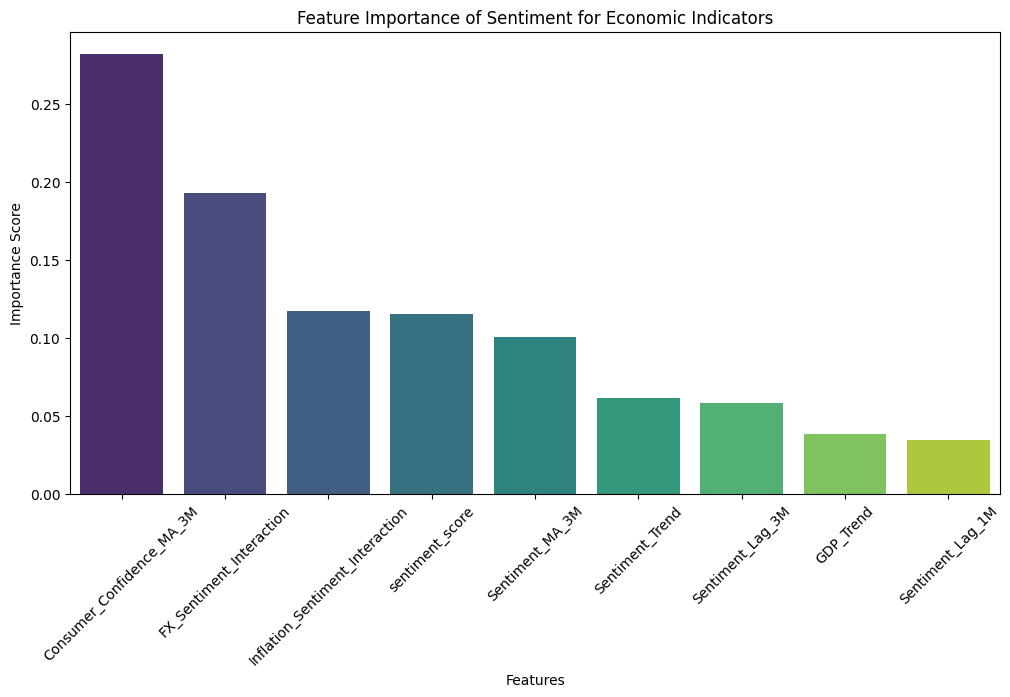

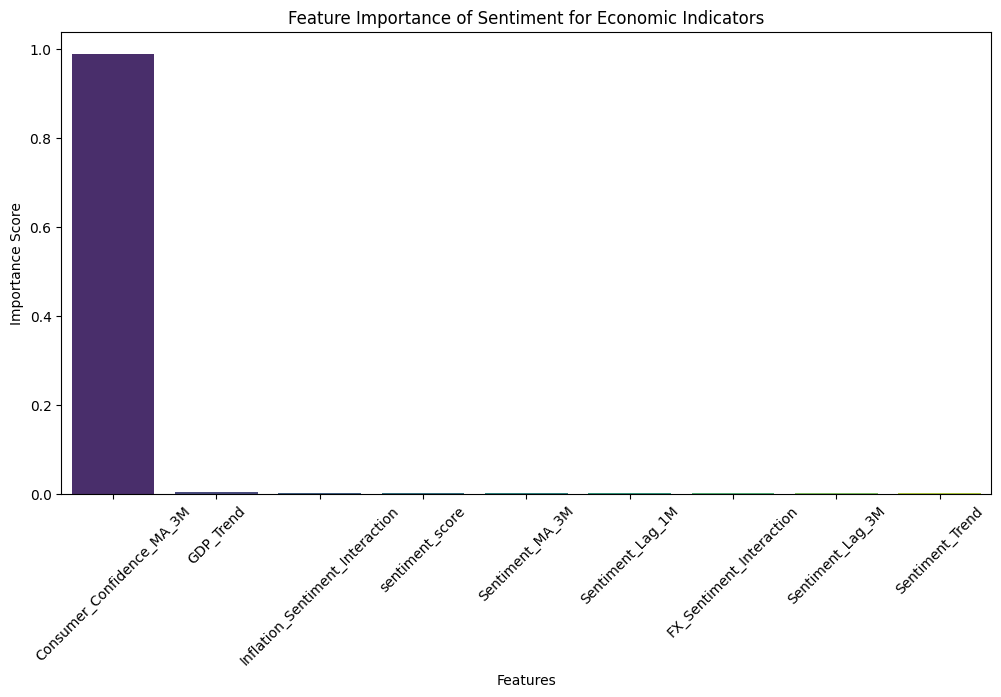

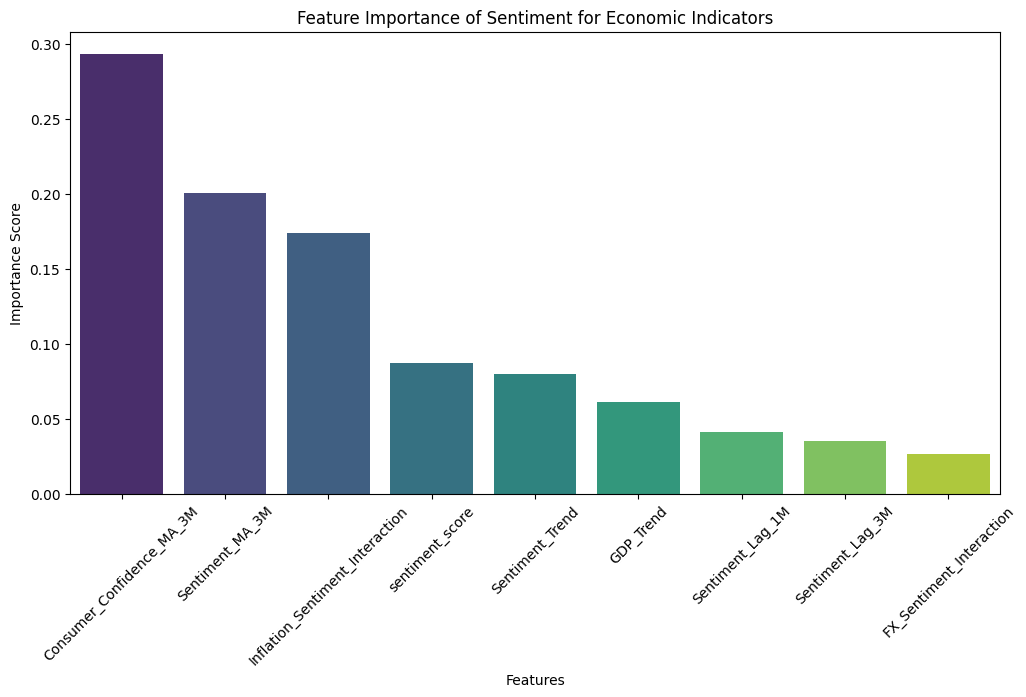

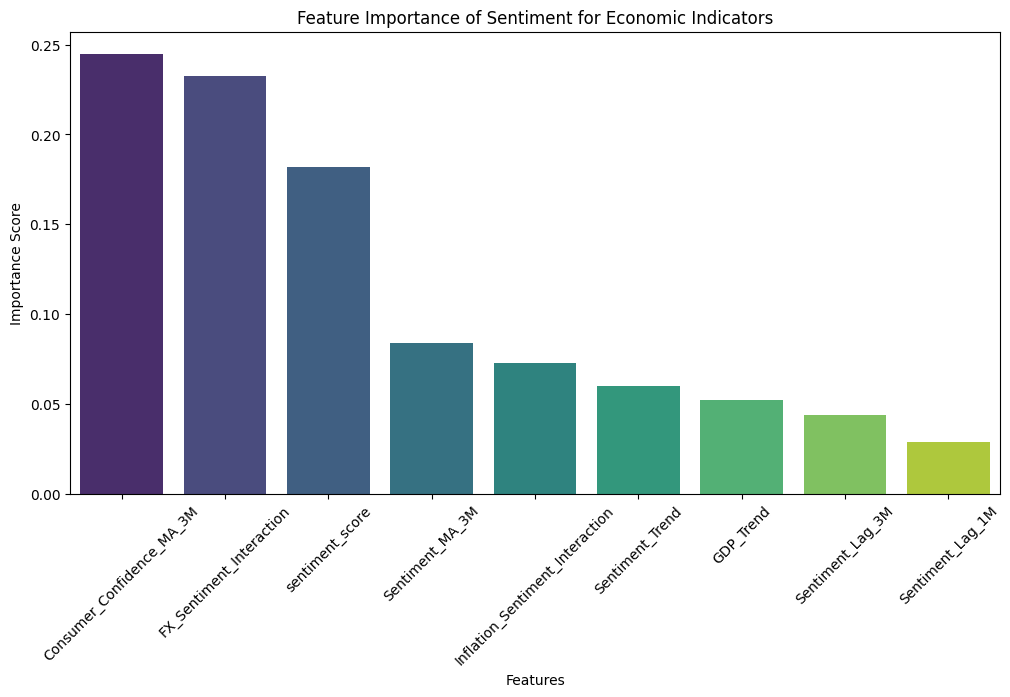

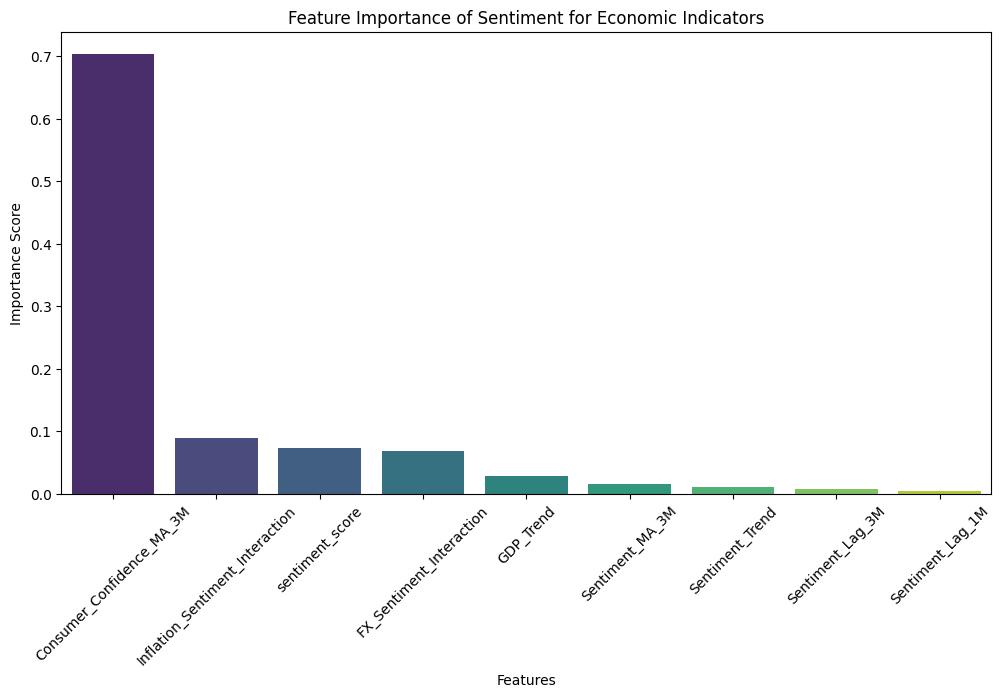

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each economic indicator to visualize feature importance
for target in economic_targets:
    xgb_model = xgb_models[target]  # Get trained model
    feature_importance = xgb_model.feature_importances_  # Extract feature importance

    # Create DataFrame for visualization
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')

    # Formatting
    plt.xticks(rotation=45)
    plt.ylabel('Importance Score')
    plt.xlabel('Features')
    plt.title(f'Feature Importance of Sentiment for Economic Indicators')  # Your preferred title
    plt.show()

### Summarise:

- Consumer Confidence MA 3M is the most dominant predictor (0.55), meaning recent consumer confidence trends are highly linked to sentiment.
- Inflation-Sentiment interaction & Sentiment MA 3M show moderate influence (0.10 & 0.09), indicating sentiment plays a role in inflation and confidence shifts.
- Other factors—lagged sentiment, FX interactions, and GDP trend—have lower importance, suggesting weaker connections between sentiment and these economic indicators.
- GDP Trend ranks lowest, meaning sentiment does not significantly drive GDP growth directly.

